In [246]:
###### test on 1d line in 3d space ######

In [247]:
%matplotlib widget  # For 3d interactive plotting 

UsageError: unrecognized arguments: # For 3d interactive plotting


In [248]:
import keras
from keras import layers

In [249]:
def square_root(t): # first example
    x = t 
    y = np.sqrt(t)
    return np.array([x,y])

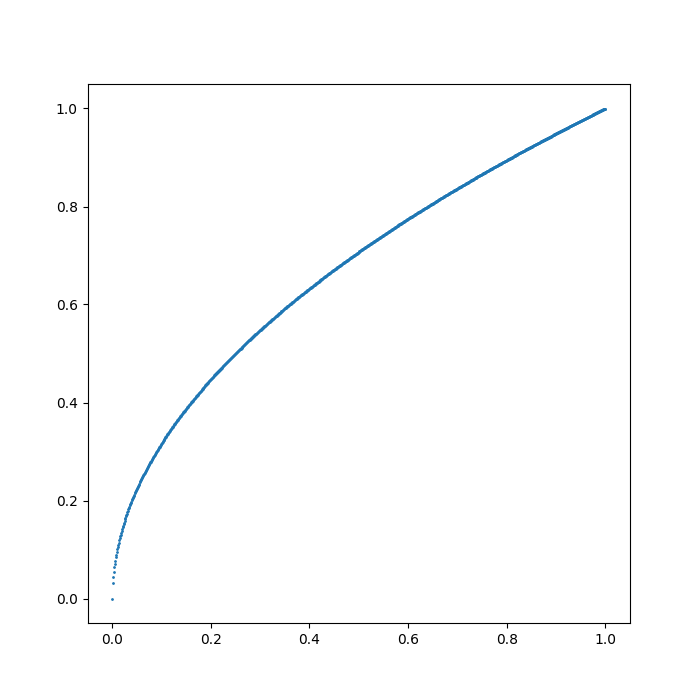

In [250]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D 

t = np.linspace(0,1,1000)
x,y = square_root(t)

plt.figure(figsize=(7,7))
plt.scatter(x,y,s=1)
plt.show()

In [319]:
encoding_dim = 1  # size of the throat : dimension of the underlying manifold

input_points = keras.Input(shape=(2,)) # 2 is the dimension of the total space 

x = layers.Dense(2, activation='sigmoid')(input_points)
#x = layers.Dense(16, activation='sigmoid')(x)
encoded = layers.Dense(encoding_dim, activation = 'sigmoid')(x)


#x = layers.Dense(16, activation='sigmoid')(encoded)
x = layers.Dense(2, activation='sigmoid')(encoded)
decoded = layers.Dense(2, activation = 'sigmoid')(x)

autoencoder = keras.Model(input_points, decoded)

In [320]:
autoencoder.summary() #symmetric encoder 

Model: "functional_73"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_28 (InputLayer)     │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_124 (Dense)               │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_125 (Dense)               │ (None, 1)              │             3 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_126 (Dense)               │ (None, 2)              │             4 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_127 (Dense)               │ (None, 2)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19 (76.00 B)

 Trainable params: 19 (76.00 B)

 Non-trainable params: 0 (0.00 B)

In [321]:
encoder = keras.Model(input_points, encoded) # the encoder 


In [322]:
t = np.linspace(0,1,100000)
x,y = square_root(t)
set_all = np.array([x,y],dtype=float).T
print(set_all.shape)
mask_train = np.array([np.random.rand()<0.9 for i in range(100000)])
set_train = np.array([np.extract(mask_train,set_all[:,i]) for i in range(2)]).T
set_test = np.array([np.extract(1-mask_train,set_all[:,i]) for i in range(2)]).T
print(set_train.shape)
print(set_test.shape)

(100000, 2)
(89984, 2)
(10016, 2)


In [323]:
encoded_input = keras.Input(shape=(encoding_dim,))

In [324]:
autoencoder.compile(optimizer='adam', loss='mse')

In [325]:
history = autoencoder.fit(set_train, set_train,
                epochs=100,
                batch_size=100,
                shuffle=True,
                validation_data=(set_test, set_test))

Epoch 1/100
900/900 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0691 - val_loss: 0.0673
Epoch 2/100
900/900 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0645 - val_loss: 0.0429
Epoch 3/100
900/900 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0325 - val_loss: 0.0125
Epoch 4/100
900/900 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0106 - val_loss: 0.0074
Epoch 5/100
900/900 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0068 - val_loss: 0.0050
Epoch 6/100
900/900 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0046 - val_loss: 0.0032
Epoch 7/100
900/900 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0028 - val_loss: 0.0018
Epoch 8/100
900/900 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0016 - val_loss: 9.7182e-04
Epoch 9/100
900/900 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 8.7127e-04 - val_loss: 5.8788e-04
Epoch 10/100
900/900 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 5.5904e-04 - val_loss: 4.0909e-04
Epoch 11/100
900/900 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 3.9774e-04 - val_loss: 3.2812e-04
Epoch 12/100


In [326]:
encoded_points = encoder.predict(set_test)
decoded_points = autoencoder.predict(set_test) # points that have been encoded and then decoded. set_test are not 
#part of the training set, so the autoencoder never encountered them before. 

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


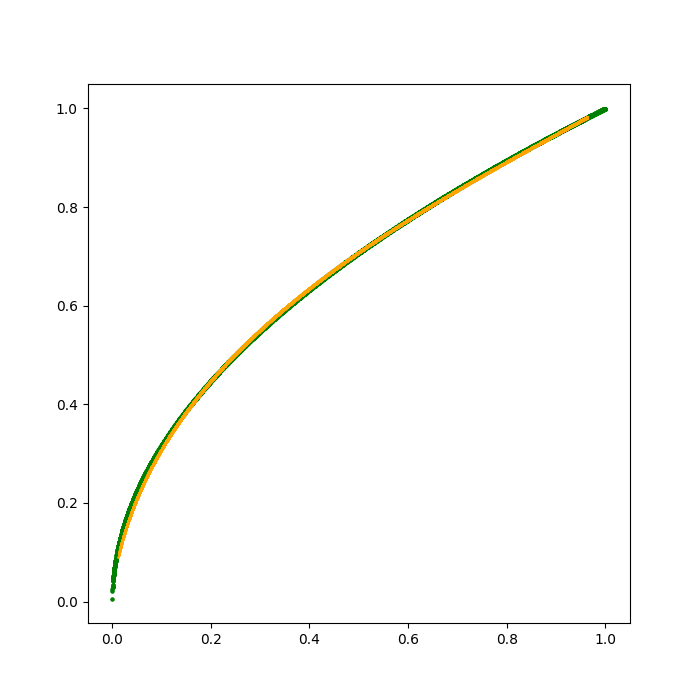

In [327]:
plt.figure(figsize = (7,7))  
                
plt.scatter(set_test[:,0], set_test[:,1],color="green",s=5) 
plt.scatter(decoded_points[:,0],decoded_points[:,1],s=1,c='orange')

plt.show()

In [331]:
# not perfect but I managed at some point to do better with different architecture. I got really nice feat. 
# I forgot to write them down :) 
# Still shows that it works and something is going on. 

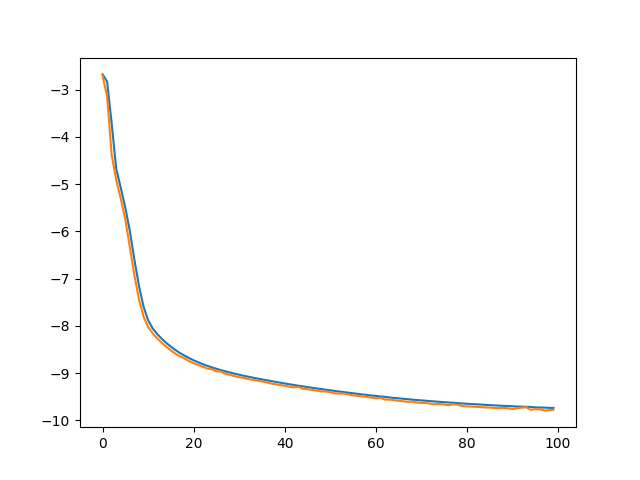

In [333]:
plt.figure()
plt.plot(np.log(history.history["loss"]))
plt.plot(np.log(history.history["val_loss"]))
plt.show()

#we see that learning stop while loss was still going down, so with longer training we would probably obtain 
#a better result

In [334]:
### helix example
# note that I have tried with larger frequency in the x,y coordinates, but in that case, the autoencoder seems
# only able to reproduce the first circle
# try 20 for example 

In [342]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models

period = 6

def helix(t):
    x = np.cos(period * t)
    y = np.sin(period * t)
    z = t
    return np.array([x, y, z])

n_points = 100000  
t_values = np.linspace(0, 1, n_points)  
data = np.array([helix(t) for t in t_values])  

mask_train = np.array([np.random.rand()<0.9 for i in range(100000)])
data_train = np.array([np.extract(mask_train,data[:,i]) for i in range(3)]).T
data_test = np.array([np.extract(1-mask_train,data[:,i]) for i in range(3)]).T
print(data_train.shape)
print(data_test.shape)



(89987, 3)
(10013, 3)


/var/folders/7f/2871v4nx3pn_dph55xj6sxq40000gn/T/ipykernel_5567/2861844402.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


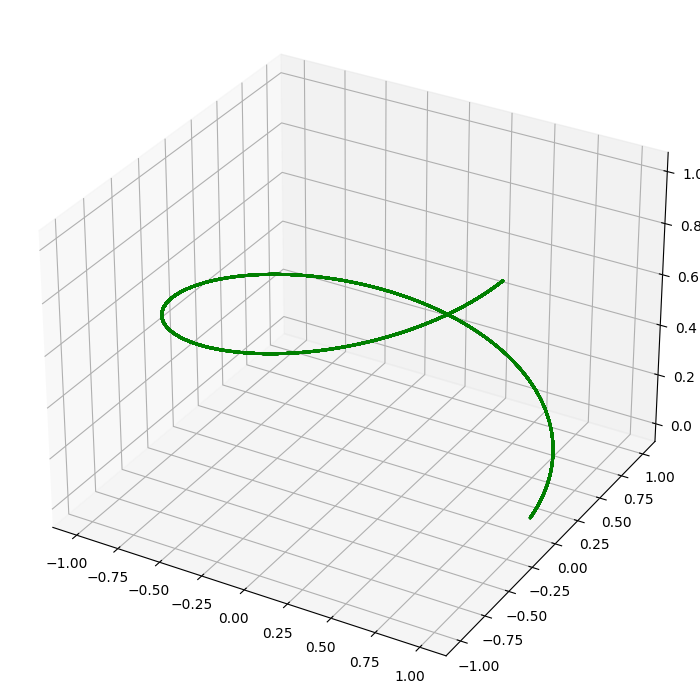

In [343]:
fig = plt.figure(figsize = (7,7)) 
ax = Axes3D(fig) 

ax.scatter(data[:,0], data[:,1], data[:,2],color="green",s=1) 

plt.show()

In [355]:
input_dim = 3 # dimension of the total space 

latent_dim = 1  # Dimension of the submanifold

# Encoder
inputs = layers.Input(shape=(input_dim,))
encoded = layers.Dense(32, activation='relu')(inputs)
encoded = layers.Dense(16, activation='relu')(encoded)
encoded = layers.Dense(8, activation='relu')(encoded)
encoded = layers.Dense(latent_dim)(encoded)  

# Decoder
decoded = layers.Dense(8, activation='relu')(encoded)
decoded = layers.Dense(16, activation='relu')(decoded)
decoded = layers.Dense(32, activation='relu')(decoded)
decoded = layers.Dense(input_dim)(decoded)  

# Auto-encodeur
autoencoder = models.Model(inputs, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

In [356]:
autoencoder.summary()

Model: "functional_91"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_32 (InputLayer)     │ (None, 3)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_144 (Dense)               │ (None, 32)             │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_145 (Dense)               │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_146 (Dense)               │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_147 (Dense)               │ (None, 1)              │             9 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_148 (Dense)               │ (None, 8)              │            16 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_149 (Dense)               │ (None, 16)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_150 (Dense)               │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_151 (Dense)               │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,604 (6.27 KB)

 Trainable params: 1,604 (6.27 KB)

 Non-trainable params: 0 (0.00 B)

In [357]:
# Training auto-encoder
history_helix = autoencoder.fit(data_train, data_train, epochs=100, batch_size=100, shuffle=True,validation_data=(data_test, data_test))


Epoch 1/100
900/900 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1338 - val_loss: 7.0092e-04
Epoch 2/100
900/900 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 4.8669e-04 - val_loss: 1.5126e-04
Epoch 3/100
900/900 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1.2819e-04 - val_loss: 6.0448e-05
Epoch 4/100
900/900 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 5.3462e-05 - val_loss: 3.7467e-05
Epoch 5/100
900/900 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 4.0377e-05 - val_loss: 3.5384e-05
Epoch 6/100
900/900 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 2.8455e-05 - val_loss: 1.8077e-05
Epoch 7/100
900/900 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 2.2675e-05 - val_loss: 2.4160e-05
Epoch 8/100
900/900 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 2.6411e-05 - val_loss: 2.0176e-05
Epoch 9/100
900/900 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 2.3248e-05 - val_loss: 1.9034e-05
Epoch 10/100
900/900 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 3.2297e-05 - val_loss: 1.9830e-05
Epoch 11/100
900/900 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step

In [358]:
# Encoder 
encoder = models.Model(inputs, encoded)

# test autoencoder
encoded_points = encoder.predict(data_test)  # should be t 
reconstructed_points = autoencoder.predict(data_test) # Here a total of 100 epochs of training 


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


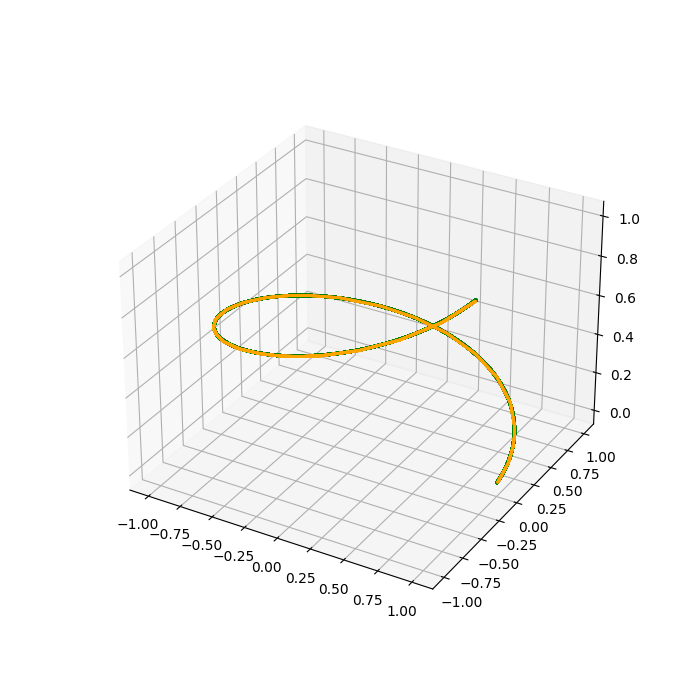

In [359]:
fig = plt.figure(figsize = (7,7)) 

ax = fig.add_subplot(projection='3d')

ax.scatter(data_test[:,0], data_test[:,1], data_test[:,2],color="green",s=2) 
ax.scatter(reconstructed_points[:,0],reconstructed_points[:,1],reconstructed_points[:,2],c="orange",s=1)

plt.show()

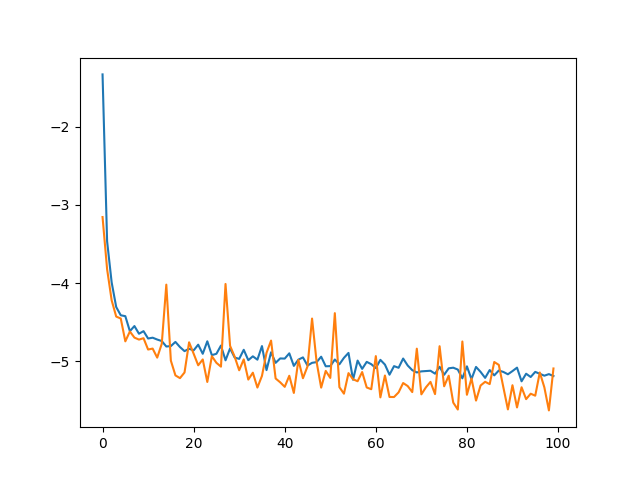

In [360]:
plt.figure()
plt.plot(np.log(history_helix.history["loss"])/np.log(10))
plt.plot(np.log(history_helix.history["val_loss"])/np.log(10))
plt.show()

In [34]:
##### 2d shape in 3d ######

In [361]:
def gaussian(t1,t2):
    x = t1
    y = t2 
    z = np.exp(-(4*(t1-0.5))**2-(4*(t2-0.5))**2)
    return np.array([x,y,z])

In [362]:
n_points = 300  # Nombre de points de l'hélice
t1_values = np.linspace(0, 1, n_points)
t2_values = np.linspace(0, 1, n_points)
data = np.array([gaussian(i,j) for i in t1_values for j in t2_values])
mask_train = np.array([np.random.rand()<0.9 for i in range(data.shape[0])])
data_train = np.array([np.extract(mask_train,data[:,i]) for i in range(3)]).T
data_test = np.array([np.extract(1-mask_train,data[:,i]) for i in range(3)]).T
print(data_train.shape)
print(data_test.shape)

(81140, 3)
(8860, 3)


/var/folders/7f/2871v4nx3pn_dph55xj6sxq40000gn/T/ipykernel_5567/71398858.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


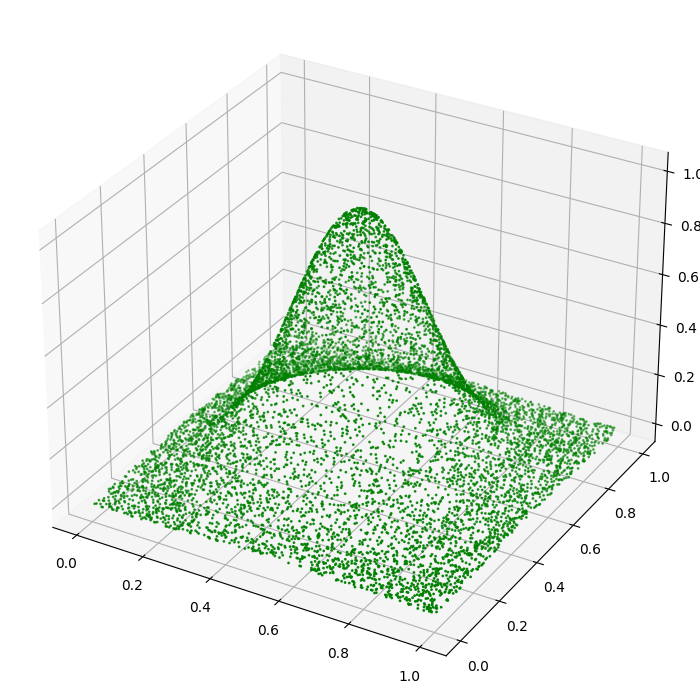

In [369]:
fig = plt.figure(figsize = (7,7)) 
ax = Axes3D(fig) 

ax.scatter(data_test[:,0], data_test[:,1], data_test[:,2],color="green",s=1) 

plt.show()

In [364]:
input_dim = 3  
latent_dim = 2  

# Encoder
inputs = layers.Input(shape=(input_dim,))
encoded = layers.Dense(32, activation='relu')(inputs)
encoded = layers.Dense(16, activation='relu')(encoded)
encoded = layers.Dense(8, activation='relu')(encoded)
encoded = layers.Dense(latent_dim)(encoded)  

# Decoder
decoded = layers.Dense(8, activation='relu')(encoded)
decoded = layers.Dense(16, activation='relu')(decoded)
decoded = layers.Dense(32, activation='relu')(decoded)
decoded = layers.Dense(input_dim)(decoded)  

# Autoencoder 
autoencoder = models.Model(inputs, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

In [365]:
autoencoder.summary()

Model: "functional_95"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_33 (InputLayer)     │ (None, 3)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_152 (Dense)               │ (None, 32)             │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_153 (Dense)               │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_154 (Dense)               │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_155 (Dense)               │ (None, 2)              │            18 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_156 (Dense)               │ (None, 8)              │            24 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_157 (Dense)               │ (None, 16)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_158 (Dense)               │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_159 (Dense)               │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,621 (6.33 KB)

 Trainable params: 1,621 (6.33 KB)

 Non-trainable params: 0 (0.00 B)

In [366]:
history_gaussian = autoencoder.fit(data_train, data_train, epochs=100, batch_size=100, shuffle=True,validation_data=(data_test, data_test))


Epoch 1/100
812/812 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0618 - val_loss: 7.4790e-04
Epoch 2/100
812/812 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 4.6831e-04 - val_loss: 1.2817e-04
Epoch 3/100
812/812 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1.1379e-04 - val_loss: 7.5824e-05
Epoch 4/100
812/812 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 7.3604e-05 - val_loss: 7.3122e-05
Epoch 5/100
812/812 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 6.1001e-05 - val_loss: 5.9329e-05
Epoch 6/100
812/812 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 5.0118e-05 - val_loss: 5.0806e-05
Epoch 7/100
812/812 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 4.7049e-05 - val_loss: 4.2298e-05
Epoch 8/100
812/812 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 4.3799e-05 - val_loss: 6.7160e-05
Epoch 9/100
812/812 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 3.9522e-05 - val_loss: 5.3711e-05
Epoch 10/100
812/812 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 3.8528e-05 - val_loss: 3.6870e-05
Epoch 11/100
812/812 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step

In [367]:
encoder = models.Model(inputs, encoded)


In [368]:
encoded_points = encoder.predict(data_test)  
reconstructed_points = autoencoder.predict(data_test) 

277/277 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
277/277 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


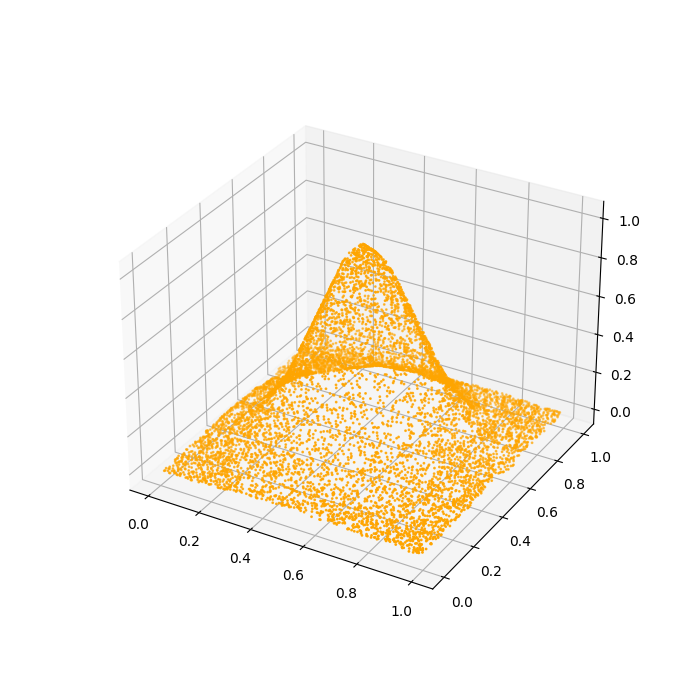

In [373]:
fig = plt.figure(figsize = (7,7)) 

ax = fig.add_subplot(projection='3d')
#ax.scatter(data_test[:,0], data_test[:,1], data_test[:,2],color="green",s=2) 
ax.scatter(reconstructed_points[:,0],reconstructed_points[:,1],reconstructed_points[:,2],c="orange",s=1)

plt.show()

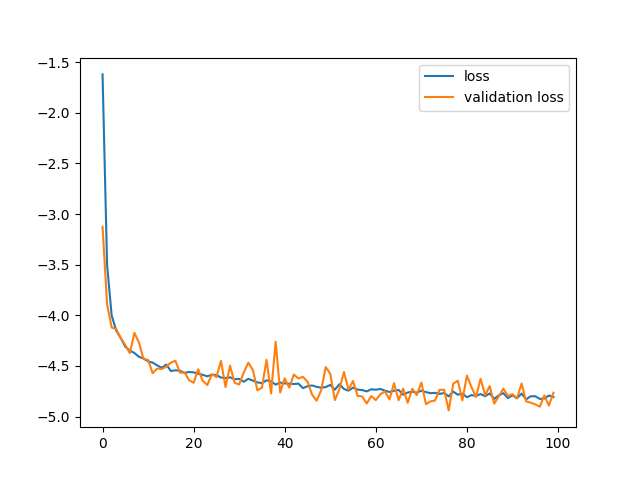

In [377]:
plt.figure()
plt.plot(np.log(history_gaussian.history["loss"])/np.log(10),label="loss")
plt.plot(np.log(history_gaussian.history["val_loss"])/np.log(10),label="validation loss")
plt.legend()
plt.show()

In [378]:
##### 2D sphere ######

In [379]:
def sphere_up(t1, t2):
    x = t1 
    y = t2
    val = 0.25 - (t1 - 0.5) ** 2 - (t2 - 0.5) ** 2
    z = np.sqrt(val) + 0.5 if val >= 0 else 0  # Pour éviter les NaN
    return np.array([x, y, z])

def sphere_down(t1, t2):
    x = t1
    y = t2
    val = 0.25 - (t1 - 0.5) ** 2 - (t2 - 0.5) ** 2
    z = -np.sqrt(val) + 0.5 if val >= 0 else 0  # Pour éviter les NaN
    return np.array([x, y, z])

In [380]:
n_points = 300  # Nombre de points de l'hélice
t1_values = np.linspace(0, 1, n_points)
t2_values = np.linspace(0, 1, n_points)
data = np.array([[sphere_up(i,j),sphere_down(i,j)] for i in t1_values for j in t2_values])
data = data.reshape((2*n_points**2,3))
mask_train = np.array([np.random.rand()<0.9 for i in range(data.shape[0])])
data_train = np.array([np.extract(mask_train,data[:,i]) for i in range(3)]).T
data_test = np.array([np.extract(1-mask_train,data[:,i]) for i in range(3)]).T
print(data_train.shape)
print(data_test.shape)

(161789, 3)
(18211, 3)


/var/folders/7f/2871v4nx3pn_dph55xj6sxq40000gn/T/ipykernel_5567/71398858.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


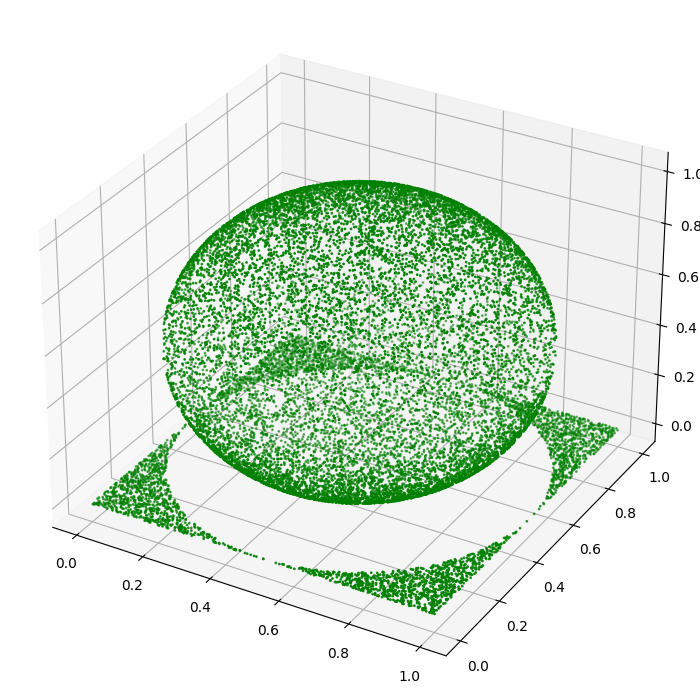

In [381]:
fig = plt.figure(figsize = (7,7)) 
ax = Axes3D(fig) 

ax.scatter(data_test[:,0], data_test[:,1], data_test[:,2],color="green",s=1) 

plt.show()

In [382]:
# Création de l'auto-encodeur
input_dim = 3  # Points de l'hélice (x, y, z)
latent_dim = 2  # Nous voulons réduire à une seule variable (t)

# Encoder
inputs = layers.Input(shape=(input_dim,))
encoded = layers.Dense(32, activation='relu')(inputs)
encoded = layers.Dense(16, activation='relu')(encoded)
encoded = layers.Dense(8, activation='relu')(encoded)
encoded = layers.Dense(latent_dim)(encoded)  # Réduire à une dimension (t)

# Decoder
decoded = layers.Dense(8, activation='relu')(encoded)
decoded = layers.Dense(16, activation='relu')(decoded)
decoded = layers.Dense(32, activation='relu')(decoded)
decoded = layers.Dense(input_dim)(decoded)  # Reconstruire (x, y, z)

# Modèle auto-encodeur
autoencoder = models.Model(inputs, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

In [383]:
autoencoder.summary()

Model: "functional_99"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_34 (InputLayer)     │ (None, 3)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_160 (Dense)               │ (None, 32)             │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_161 (Dense)               │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_162 (Dense)               │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_163 (Dense)               │ (None, 2)              │            18 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_164 (Dense)               │ (None, 8)              │            24 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_165 (Dense)               │ (None, 16)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_166 (Dense)               │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_167 (Dense)               │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,621 (6.33 KB)

 Trainable params: 1,621 (6.33 KB)

 Non-trainable params: 0 (0.00 B)

In [384]:
history_sphere = autoencoder.fit(data_train, data_train, epochs=200, batch_size=100, shuffle=True,validation_data=(data_test, data_test))


Epoch 1/200
1618/1618 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 0.0496 - val_loss: 0.0052
Epoch 2/200
1618/1618 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0036 - val_loss: 0.0018
Epoch 3/200
1618/1618 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0013 - val_loss: 0.0012
Epoch 4/200
1618/1618 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 7.9805e-04 - val_loss: 8.3521e-04
Epoch 5/200
1618/1618 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 9.0764e-04 - val_loss: 7.2469e-04
Epoch 6/200
1618/1618 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 5.2551e-04 - val_loss: 4.7299e-04
Epoch 7/200
1618/1618 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 6.2420e-04 - val_loss: 4.0218e-04
Epoch 8/200
1618/1618 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 4.0460e-04 - val_loss: 4.0341e-04
Epoch 9/200
1618/1618 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 3.1536e-04 - val_loss: 2.8056e-04
Epoch 10/200
1618/1618 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 4.4130e-04 - val_loss: 5.4993e-04
Epoch 11/200
1618/1618 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/st

Epoch 125/200
1618/1618 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 4.6145e-05 - val_loss: 4.9080e-05
Epoch 126/200
1618/1618 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 5.1915e-05 - val_loss: 4.8063e-05
Epoch 127/200
1618/1618 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 9.3575e-05 - val_loss: 7.2046e-05
Epoch 128/200
1618/1618 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 9.7603e-05 - val_loss: 1.2120e-04
Epoch 129/200
1618/1618 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 9.6664e-05 - val_loss: 5.7190e-05
Epoch 130/200
1618/1618 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 8.7618e-05 - val_loss: 3.9535e-05
Epoch 131/200
1618/1618 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 7.1754e-05 - val_loss: 3.4248e-05
Epoch 132/200
1618/1618 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 4.8574e-05 - val_loss: 5.4105e-05
Epoch 133/200
1618/1618 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 4.1506e-05 - val_loss: 3.5595e-05
Epoch 134/200
1618/1618 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 4.2883e-05 - val_loss: 5.5750e-05
Epoch 135/

In [385]:
encoder = models.Model(inputs, encoded)

In [386]:
encoded_points = encoder.predict(data_test)  
reconstructed_points = autoencoder.predict(data_test)  

570/570 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
570/570 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


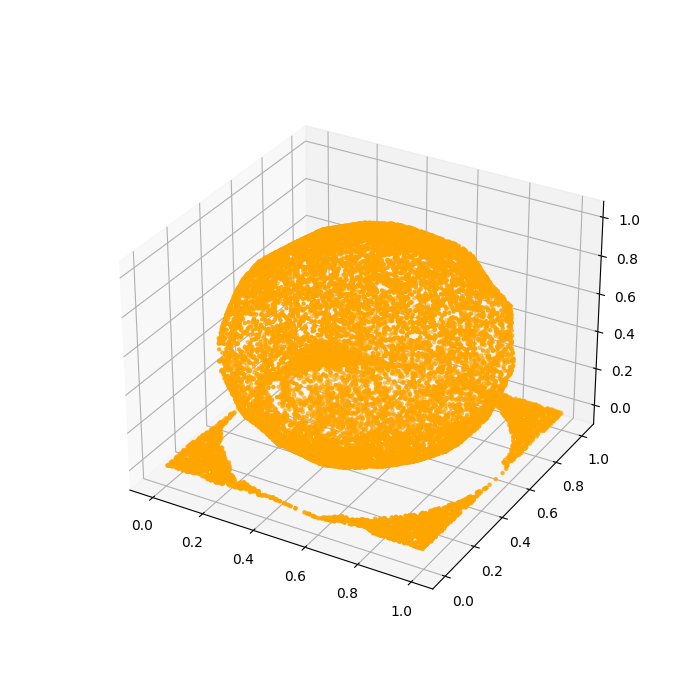

In [387]:
fig = plt.figure(figsize = (7,7)) 
ax = fig.add_subplot(projection='3d')

#ax.scatter(data_test[:,0], data_test[:,1], data_test[:,2],color="green",s=2) 
ax.scatter(reconstructed_points[:,0],reconstructed_points[:,1],reconstructed_points[:,2],c="orange",s=5)

plt.show()

In [ ]:
# Not too bad !
# Possible ways to do bette : 
#   - more points 
#   - more training
#   - wider and deeper NN 

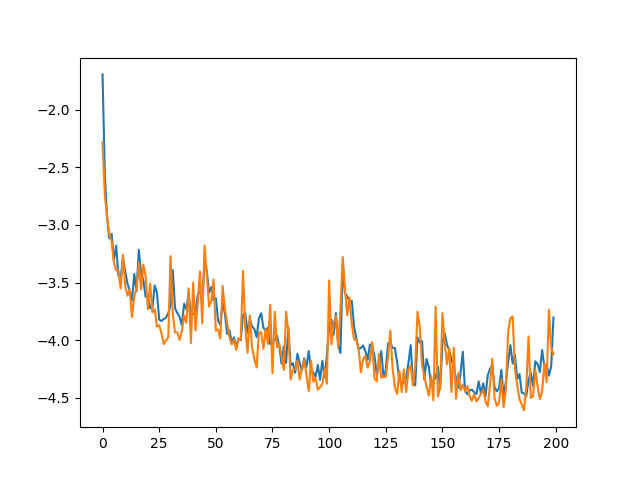

In [390]:
plt.figure()
plt.plot(np.log(history_sphere.history["loss"])/np.log(10))
plt.plot(np.log(history_sphere.history["val_loss"])/np.log(10))
plt.show()

In [487]:
# Creating deeper and wider autoencoder
input_dim = 3  # Points de l'hélice (x, y, z)
latent_dim = 2  # Nous voulons réduire à une seule variable (t)

# Encoder
inputs = layers.Input(shape=(input_dim,))
encoded = layers.Dense(32, activation='relu')(inputs)
encoded = layers.Dense(32, activation='relu')(encoded)
encoded = layers.Dense(16, activation='relu')(encoded)
encoded = layers.Dense(8, activation='relu')(encoded)
encoded = layers.Dense(latent_dim)(encoded)  # Réduire à une dimension (t)

# Decoder
decoded = layers.Dense(8, activation='relu')(encoded)
decoded = layers.Dense(16, activation='relu')(decoded)
decoded = layers.Dense(32, activation='relu')(decoded)
decoded = layers.Dense(32, activation='relu')(decoded)
decoded = layers.Dense(input_dim)(decoded)  # Reconstruire (x, y, z)

# Modèle auto-encodeur
autoencoder_deep = models.Model(inputs, decoded)
autoencoder_deep.compile(optimizer='adam', loss='mse')

In [488]:
autoencoder_deep.summary()

Model: "functional_131"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_44 (InputLayer)     │ (None, 3)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_245 (Dense)               │ (None, 32)             │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_246 (Dense)               │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_247 (Dense)               │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_248 (Dense)               │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_249 (Dense)               │ (None, 2)              │            18 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_250 (Dense)               │ (None, 8)              │            24 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_251 (Dense)               │ (None, 16)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_252 (Dense)               │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_253 (Dense)               │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_254 (Dense)               │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,733 (14.58 KB)

 Trainable params: 3,733 (14.58 KB)

 Non-trainable params: 0 (0.00 B)

In [489]:
history_sphere_deep = autoencoder_deep.fit(data_train, data_train, epochs=500, batch_size=1000, shuffle=True,validation_data=(data_test, data_test))


Epoch 1/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.1535 - val_loss: 0.0214
Epoch 2/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0162 - val_loss: 0.0104
Epoch 3/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0095 - val_loss: 0.0058
Epoch 4/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0048 - val_loss: 0.0026
Epoch 5/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0024 - val_loss: 0.0019
Epoch 6/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0018 - val_loss: 0.0015
Epoch 7/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0015 - val_loss: 0.0014
Epoch 8/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0014 - val_loss: 0.0013
Epoch 9/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 10/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 11/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0012 - val_loss: 0.0010
Epoch 12/500
162/162 ━━━━━━━━━━━━━━━━━━━

Epoch 65/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.7223e-04 - val_loss: 3.4102e-04
Epoch 66/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.4429e-04 - val_loss: 2.9078e-04
Epoch 67/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.1939e-04 - val_loss: 2.4050e-04
Epoch 68/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.6503e-04 - val_loss: 2.7435e-04
Epoch 69/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.0280e-04 - val_loss: 3.3774e-04
Epoch 70/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.9461e-04 - val_loss: 2.4273e-04
Epoch 71/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.1248e-04 - val_loss: 3.3241e-04
Epoch 72/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4.3562e-04 - val_loss: 2.5177e-04
Epoch 73/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.4504e-04 - val_loss: 3.2817e-04
Epoch 74/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3.4414e-04 - val_loss: 8.1871e-04
Epoch 75/500
162/162 ━━━━━━━━━━━━━━━━━━━

Epoch 128/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.2767e-04 - val_loss: 4.9445e-04
Epoch 129/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4.9150e-04 - val_loss: 0.0015
Epoch 130/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0011 - val_loss: 4.7547e-04
Epoch 131/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4.4132e-04 - val_loss: 4.1990e-04
Epoch 132/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 5.0645e-04 - val_loss: 6.5523e-04
Epoch 133/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 7.4063e-04 - val_loss: 8.5560e-04
Epoch 134/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 7.0754e-04 - val_loss: 0.0010
Epoch 135/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 8.1854e-04 - val_loss: 7.7863e-04
Epoch 136/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 9.7258e-04 - val_loss: 0.0011
Epoch 137/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 9.8933e-04 - val_loss: 6.3220e-04
Epoch 138/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 

162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0013 - val_loss: 9.6825e-04
Epoch 254/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0010 - val_loss: 7.8231e-04
Epoch 255/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 7.9202e-04 - val_loss: 6.5702e-04
Epoch 256/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 6.8708e-04 - val_loss: 5.5372e-04
Epoch 257/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 6.2052e-04 - val_loss: 5.0091e-04
Epoch 258/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4.8591e-04 - val_loss: 4.4694e-04
Epoch 259/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4.6860e-04 - val_loss: 4.8584e-04
Epoch 260/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4.2569e-04 - val_loss: 3.6843e-04
Epoch 261/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4.0901e-04 - val_loss: 3.5133e-04
Epoch 262/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.6389e-04 - val_loss: 3.3663e-04
Epoch 263/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/st

162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 6.4625e-05 - val_loss: 4.9146e-05
Epoch 378/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 7.1078e-05 - val_loss: 7.9440e-05
Epoch 379/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 6.2339e-05 - val_loss: 7.6697e-05
Epoch 380/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 6.3247e-05 - val_loss: 8.0349e-05
Epoch 381/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 6.0007e-05 - val_loss: 5.4240e-05
Epoch 382/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 5.8093e-05 - val_loss: 9.2933e-05
Epoch 383/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 6.5872e-05 - val_loss: 1.0397e-04
Epoch 384/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 6.2761e-05 - val_loss: 5.7025e-05
Epoch 385/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 6.0515e-05 - val_loss: 5.5630e-05
Epoch 386/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 6.2633e-05 - val_loss: 4.4711e-05
Epoch 387/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1

In [490]:
encoder_deep = models.Model(inputs, encoded)

In [491]:
encoded_points_deep = encoder_deep.predict(data_test)  
reconstructed_points_deep = autoencoder_deep.predict(data_test)  

570/570 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
570/570 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


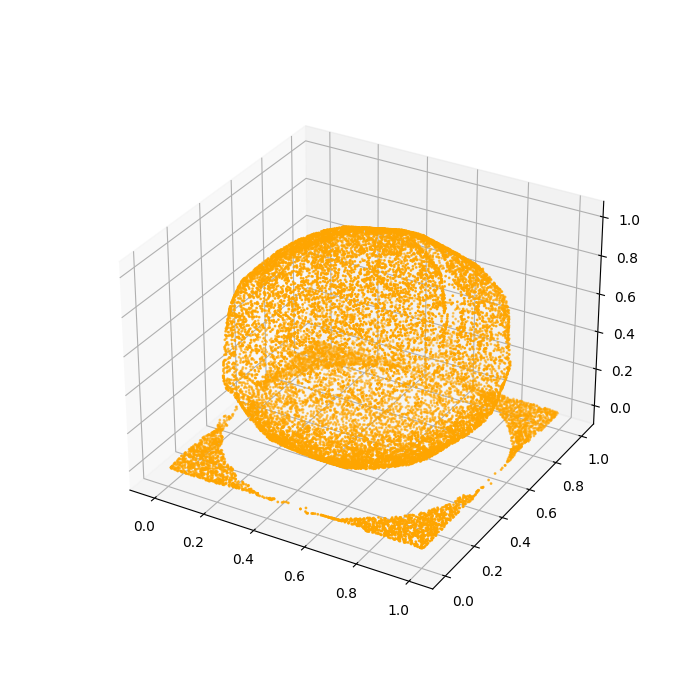

In [501]:
fig = plt.figure(figsize = (7,7)) 
ax = fig.add_subplot(projection='3d')

#ax.scatter(data_test[:,0], data_test[:,1], data_test[:,2],color="green",s=2) 
ax.scatter(reconstructed_points_deep[:,0],reconstructed_points_deep[:,1],reconstructed_points_deep[:,2],c="orange",s=1)

plt.show()

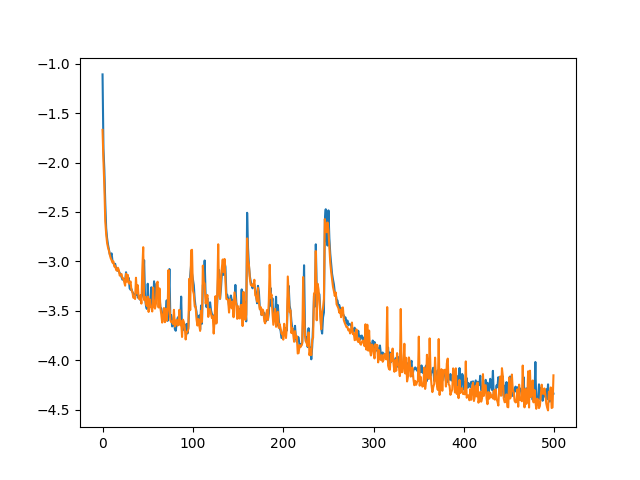

In [493]:
plt.figure()
plt.plot(np.log(history_sphere_deep.history["loss"])/np.log(10))
plt.plot(np.log(history_sphere_deep.history["val_loss"])/np.log(10))
plt.show()

In [494]:
# not too bad. Let's train it for another 500 epochs 

In [495]:
history_sphere_deep1 = autoencoder_deep.fit(data_train, data_train, epochs=500, batch_size=1000, shuffle=True,validation_data=(data_test, data_test))


Epoch 1/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 5.2564e-05 - val_loss: 1.0766e-04
Epoch 2/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 5.2735e-05 - val_loss: 4.8733e-05
Epoch 3/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 4.3996e-05 - val_loss: 3.2086e-05
Epoch 4/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4.7502e-05 - val_loss: 4.0028e-05
Epoch 5/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 6.8535e-05 - val_loss: 9.9595e-05
Epoch 6/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 7.4278e-05 - val_loss: 3.2690e-05
Epoch 7/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.9165e-05 - val_loss: 3.2973e-05
Epoch 8/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.7814e-05 - val_loss: 8.7649e-05
Epoch 9/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4.6182e-05 - val_loss: 4.4245e-05
Epoch 10/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4.6846e-05 - val_loss: 5.1534e-05
Epoch 11/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/

162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.7606e-05 - val_loss: 2.9438e-05
Epoch 65/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.8512e-05 - val_loss: 2.9139e-05
Epoch 66/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.2150e-05 - val_loss: 4.2878e-05
Epoch 67/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4.4850e-05 - val_loss: 4.3478e-05
Epoch 68/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.7277e-05 - val_loss: 2.8795e-05
Epoch 69/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.4956e-05 - val_loss: 5.6083e-05
Epoch 70/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.7147e-05 - val_loss: 3.4557e-05
Epoch 71/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4.2588e-05 - val_loss: 8.4091e-05
Epoch 72/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3.9213e-05 - val_loss: 2.9968e-05
Epoch 73/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 4.0447e-05 - val_loss: 3.4386e-05
Epoch 74/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

Epoch 127/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.2673e-05 - val_loss: 3.0098e-05
Epoch 128/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4.3752e-05 - val_loss: 2.5926e-05
Epoch 129/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.6672e-05 - val_loss: 5.0052e-05
Epoch 130/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.0943e-05 - val_loss: 6.0065e-05
Epoch 131/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.7217e-05 - val_loss: 3.9867e-05
Epoch 132/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.1454e-05 - val_loss: 5.6062e-05
Epoch 133/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.5295e-05 - val_loss: 5.7599e-05
Epoch 134/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.6232e-05 - val_loss: 3.1898e-05
Epoch 135/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.8414e-05 - val_loss: 3.2859e-05
Epoch 136/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.1407e-05 - val_loss: 2.5987e-05
Epoch 137/500
162/162 ━━━━━━━━

162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.3321e-05 - val_loss: 2.4751e-05
Epoch 252/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.5419e-05 - val_loss: 2.6433e-05
Epoch 253/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.3049e-05 - val_loss: 2.2649e-05
Epoch 254/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.3353e-05 - val_loss: 1.9962e-05
Epoch 255/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.0654e-05 - val_loss: 6.1578e-05
Epoch 256/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.1488e-05 - val_loss: 2.8955e-05
Epoch 257/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.1291e-05 - val_loss: 3.4283e-05
Epoch 258/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.2893e-05 - val_loss: 2.1089e-05
Epoch 259/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.6245e-05 - val_loss: 2.9663e-05
Epoch 260/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.8650e-05 - val_loss: 3.3000e-05
Epoch 261/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1

162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2.2289e-05 - val_loss: 4.5546e-05
Epoch 376/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 2.9016e-05 - val_loss: 2.2244e-05
Epoch 377/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.8823e-05 - val_loss: 1.6953e-05
Epoch 378/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3.0115e-05 - val_loss: 2.5122e-05
Epoch 379/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.5762e-05 - val_loss: 2.3486e-05
Epoch 380/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.5740e-05 - val_loss: 1.9493e-05
Epoch 381/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.2299e-05 - val_loss: 2.0200e-05
Epoch 382/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.6302e-05 - val_loss: 1.9186e-05
Epoch 383/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.1018e-05 - val_loss: 5.6157e-05
Epoch 384/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.1850e-05 - val_loss: 2.1729e-05
Epoch 385/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1

162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.3332e-05 - val_loss: 2.1955e-05
Epoch 500/500
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.8318e-05 - val_loss: 4.0606e-05


In [ ]:
encoder_deep1 = models.Model(inputs, encoded)

In [498]:
encoded_points_deep1 = encoder_deep.predict(data_test)  
reconstructed_points_deep1 = autoencoder_deep.predict(data_test)  

570/570 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
570/570 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


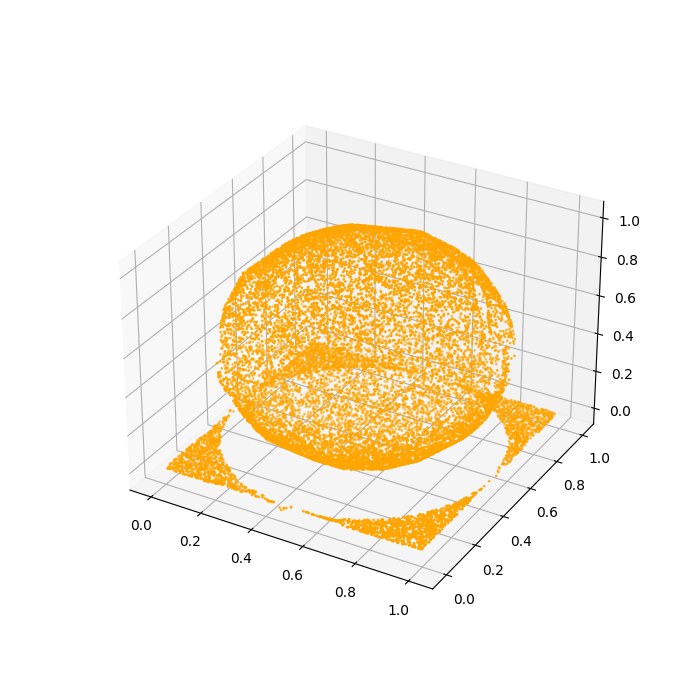

In [500]:
fig = plt.figure(figsize = (7,7)) 
ax = fig.add_subplot(projection='3d')

#ax.scatter(data_test[:,0], data_test[:,1], data_test[:,2],color="green",s=2) 
ax.scatter(reconstructed_points_deep1[:,0],reconstructed_points_deep1[:,1],reconstructed_points_deep1[:,2],c="orange",s=1)

plt.show()

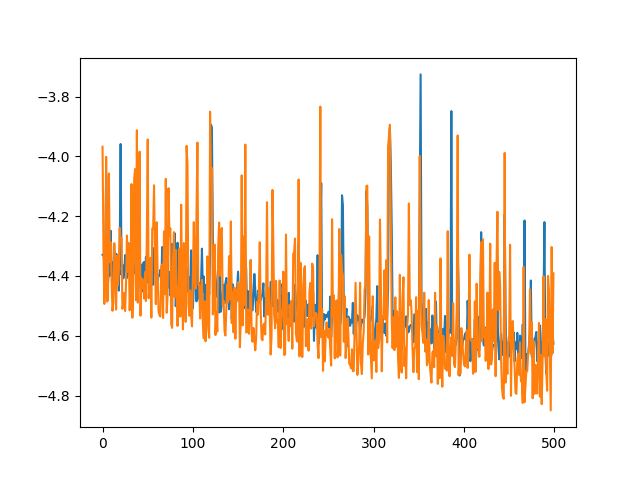

In [497]:
plt.figure()
plt.plot(np.log(history_sphere_deep1.history["loss"])/np.log(10))
plt.plot(np.log(history_sphere_deep1.history["val_loss"])/np.log(10))
plt.show()

In [427]:
# Does not look particularly better ... Maybe recquires another architecture